1. Formular el problema de cuadrados mínimos para el ajuste solicitado, escribiendo la matriz de diseño, el vector de parámetros, el vector de datos a ajustar, las ecuaciones normales, y las dimensiones de cada uno.
2. Hallar la solución al problema resolviendo las ecuaciones normales.
3. Calcular el error de aproximación dado por ∥y − X ˆa∥.
4. Reportar los valores de los parámetros óptimos hallados redondeando a una cantidad de cifras significativas razonable.

Ejercicio 1. Ajuste lineal.
a)Hallar la recta que mejor aproxima el conjunto de datos (1) en el sentido de cuadrados mínimos.
b)Graficar en una misma figura los datos (xi, yi) junto con la recta ajustada.
c)¿Qué valor se obtendría si se usara la recta ajustada para intentar estimar el valor de la función
desconocida cuando x = 5?

# Matriz de Diseño
La matriz de diseño se representa como 
${\mathbb{R}^m}$ :
$$X=
\begin{bmatrix}
    1 & x_{1}\\
    1 & x_{2}\\
    \vdots & \vdots\\
    1 & x_{m}\\
\end{bmatrix}
$$

x son los datos de la muestra y m es el tamaño de la muestra
# Vector de Parámetros
El vector de parámetros se representa como:
${\mathbb{R}^2}$ :
$$a=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
\end{bmatrix}

$$
# Vector de Datos a Ajustar
El vector de datos a ajustar se representa como:
${\mathbb{R}^m}$ :
$$
y=
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{m}\\
\end{bmatrix}
$$
y son los datos de la muestra y m es el tamaño de la muestra
# Ecuaciones Normales
Las ecuaciones normales para el ajuste lineal son:
$$
X^T X \theta = X^T y
$$


In [3]:
#vector parametros = a
#vector resultados = y

import numpy as np
x, y = np.load("ejercicio_1.npy")
x = np.array(x)
y = np.array(y)

matrix_design = np.column_stack((np.ones_like(x),x))
matrix_designT = np.transpose(matrix_design)

inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)

error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)

B0 = a[0]
B1 = a[1]
print('B0=', round(B0,2),'B1=', round(B1,2))

B0= 5.12 B1= 1.88


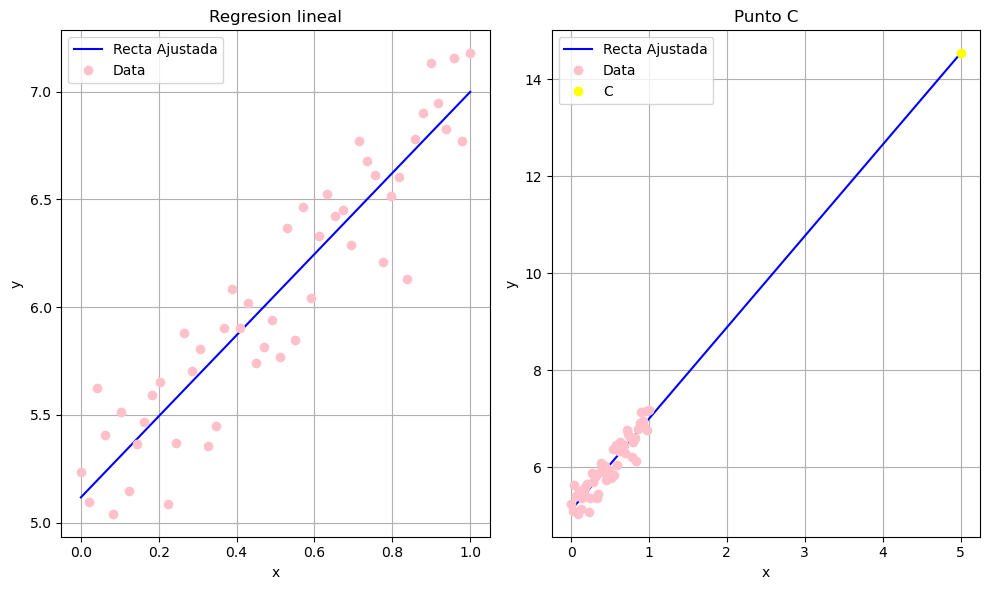

Se obtendría para intentar estimar el valor de la función desconocida cuando x=5, y= 14.53


In [4]:
import matplotlib.pyplot as plt

xs = np.linspace(0, 1, 100)
ys = B0 + B1*xs 

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, ys, label='Recta Ajustada', color='blue')
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion lineal')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
xs = np.linspace(0, 5, 100)
ys = B0 + B1*xs 
c = B0 + B1*5
plt.plot(xs, ys, label='Recta Ajustada', color='blue')
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(5, c, marker='o', label='C', color='yellow', linestyle='')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Punto C')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print('Se obtendría para intentar estimar el valor de la función desconocida cuando x=5, y=', round(c,2))

Ejercicio 2. Ajustes polinomiales.
a)Hallar la parábola que mejor aproxima el conjunto de datos (2) en el sentido de cuadrados mínimos.
b)Repetir con una función cúbica.
c)Graficar en una misma figura los datos junto con ambas curvas halladas.
d)¿Cuál es mejor?

In [5]:
#vector parametros = a
#vector resultados = y

import numpy as np
x, y = np.load("ejercicio_2.npy")
x = np.array(x)
y = np.array(y)

matrix_design = np.column_stack((np.ones_like(x),x,x**2))
matrix_designT = np.transpose(matrix_design)

inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)

error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)

B0_2 = a[0]
B1_2 = a[1]
B2_2 = a[2]
print('B0=', round(B0_2,2),'B1=', round(B1_2,2), 'B2=', round(B2_2,2))

B0= -0.46 B1= -0.17 B2= 0.09


In [6]:
#vector parametros = a
#vector resultados = y

import numpy as np
x, y = np.load("ejercicio_2.npy")
x = np.array(x)
y = np.array(y)

matrix_design = np.column_stack((np.ones_like(x),x,x**2,x**3))
matrix_designT = np.transpose(matrix_design)

inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)

error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)

B0_3 = a[0]
B1_3 = a[1]
B2_3 = a[2]
B3_3 = a[3]
print('B0=', round(B0_3,2),'B1=', round(B1_3,2), 'B2=', round(B2_3,2), 'B3=', round(B3_3,2))

B0= -25.95 B1= 28.53 B2= -10.01 B3= 1.12


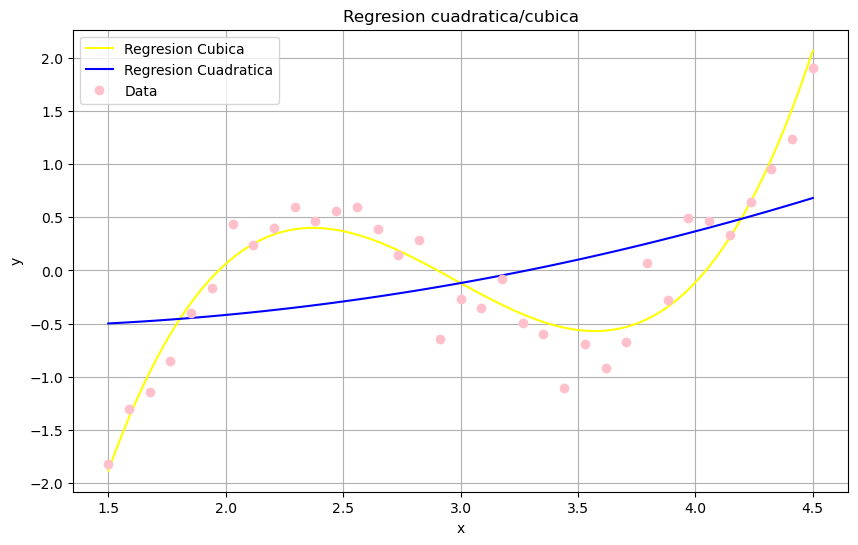

Cubica mejor


In [7]:
import matplotlib.pyplot as plt

xs = np.linspace(1.5, 4.5, 100)
ys = B0_2 + B1_2*xs + B2_2*xs*xs
yss = B0_3 + B1_3*xs + B2_3*xs*xs +  B3_3*xs*xs*xs

plt.figure(figsize=(10, 6))
plt.plot(xs, yss, label='Regresion Cubica', color='yellow')
plt.plot(xs, ys, label='Regresion Cuadratica', color='blue')
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion cuadratica/cubica')
plt.grid(True)
plt.legend()
plt.show()
print('Cubica mejor')

Ejercicio 3. Ajustes no polinomiales.
El objetivo en esta sección es explorar otras formas funcionales no polinomiales. (Ver por ejemplo
Series de Fourier). Tener en cuenta el trade-off entre cantidad de parámetros involucrados y el error de
aproximación, es decir, estimar la mínima cantidad de parámetros que resulten en un ajuste razonable.

a)Para los conjuntos de datos (3.i) y (3.ii) por separado, proponer una forma funcional adecuada
y hallar la curva de la forma propuesta que mejor aproxima los datos en el sentido de cuadrados
mínimos.
b)Graficar en dos figuras distintas los conjuntos de datos y las curvas ajustadas en cada caso

In [8]:
#vector parametros = a
#vector resultados = y

import numpy as np
x, y = np.load("ejercicio_3_i.npy")
x = np.array(x)
y = np.array(y)

matrix_design = np.column_stack((x,np.cos(x),np.cos(x)**2,np.cos(x)**3))
matrix_designT = np.transpose(matrix_design)

inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)

error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)

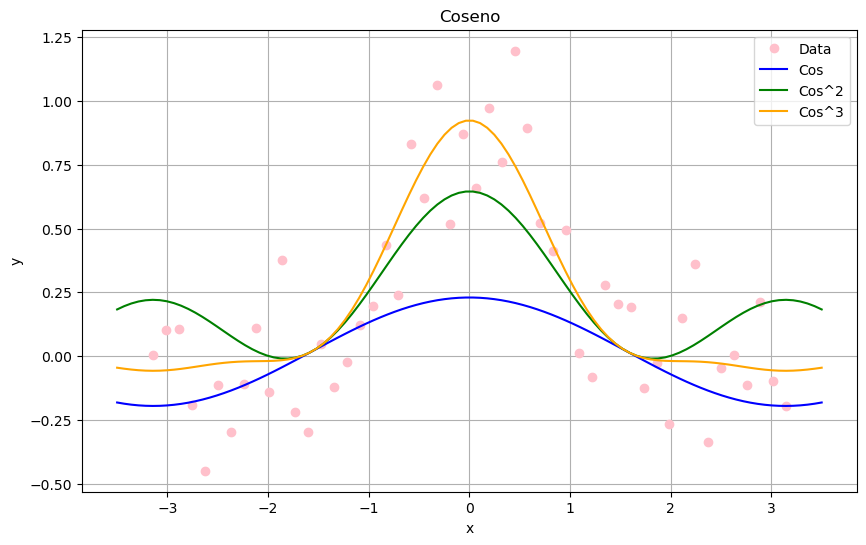

In [9]:
import matplotlib.pyplot as plt

xs = np.linspace(-3.5, 3.5, 100)
y1 = a[0] + a[1]*np.cos(xs)
y2 = a[0] + a[1]*np.cos(xs)+ a[2]*(np.cos(xs)**2) 
y3 = a[0] + a[1]*np.cos(xs)+ a[2]*(np.cos(xs)**2) + a[3]*(np.cos(xs)**3)

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(xs, y1, label='Cos', color='blue')
plt.plot(xs, y2, label='Cos^2', color='green')
plt.plot(xs, y3, label='Cos^3', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coseno')
plt.grid(True)
plt.legend()
plt.show()

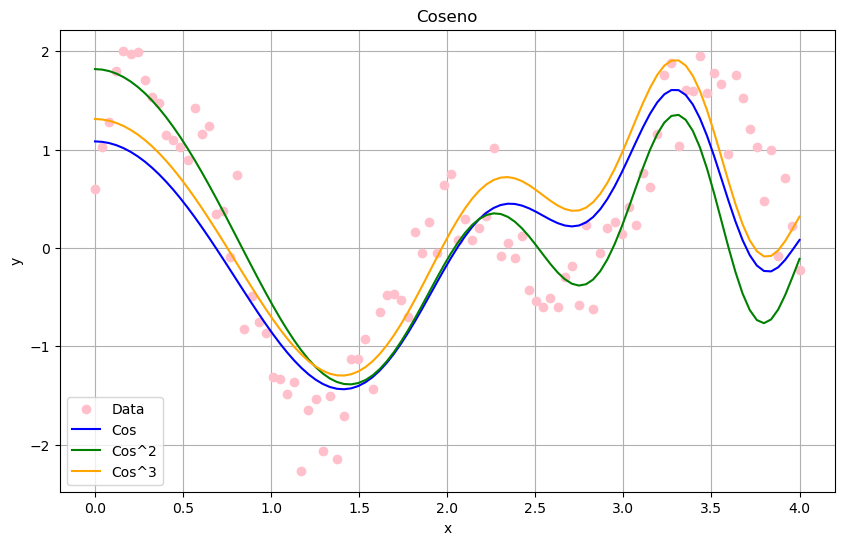

[0.07957256, -0.05204765, -0.0]


In [10]:
#vector parametros = a
#vector resultados = y
x, y = np.load("ejercicio_3_ii.npy")
x = np.array(x)
y = np.array(y)

O = 2 #2
P = 2 #2

matrix_design = np.column_stack((x,np.cos(x*O),np.sin(x**P)))
matrix_designT = np.transpose(matrix_design)
inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a1 = np.matmul(inverse,y)
error1 = y - np.matmul(matrix_design,a1)
norma1 = np.linalg.norm(error)

matrix_design = np.column_stack((x,np.cos(x*O),np.sin(x**P), np.cos(x)))
matrix_designT = np.transpose(matrix_design)
inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a2 = np.matmul(inverse,y)
error2 = y - np.matmul(matrix_design,a2)
norma2 = np.linalg.norm(error)

matrix_design = np.column_stack((x,np.cos(x*O),np.sin(x**P), np.cos(x)**2))
matrix_designT = np.transpose(matrix_design)
inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a3 = np.matmul(inverse,y)
error3 = y - np.matmul(matrix_design,a3)
norma3 = np.linalg.norm(error)

xs = np.linspace(0, 4, 100)
y1 = a1[0] + a1[1]*(np.cos(xs*O))+a1[2]*(np.sin(xs**P))
y2 = a2[0] + a2[1]*(np.cos(xs*O))+a2[2]*(np.sin(xs**P)) + a2[3]*(np.cos(xs)**1)
y3 = a3[0] + a3[1]*(np.cos(xs*O))+a3[2]*(np.sin(xs**P)) + a3[3]*(np.cos(xs)**2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(xs, y1, label='Cos', color='blue')
plt.plot(xs, y2, label='Cos^2', color='green')
plt.plot(xs, y3, label='Cos^3', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coseno')
plt.grid(True)
plt.legend()
plt.show()

list= [error1,error2,error3]
vr = []
for x in list:
    vr.append(round(np.mean(x),8))

print(vr)


Ejercicio 4. Ajustes no lineales.
a)Hallar la curva de la forma f (x) = a xb que mejor aproxima el conjunto de datos (4.a) en el sentido
de cuadrados mínimos.
Sugerencia: recordar qué propiedades cumplen los logaritmos y ajustar por cuadrados mínimos la
función log(f (x)).
b)Repetir con el conjunto de datos (4.b) y una curva de la forma f (x) = a bx.
c)Graficar en dos figuras distintas los conjuntos de datos y las curvas ajustadas en cada caso.

C:\Users\ezema\AppData\Local\Temp\ipykernel_19192\1653236196.py:14: RuntimeWarning: invalid value encountered in log
  y1 = a[0] + a[1]*(np.log(xs))
C:\Users\ezema\AppData\Local\Temp\ipykernel_19192\1653236196.py:15: RuntimeWarning: invalid value encountered in log
  y2 = np.log(a[0]) + a[1]*(np.log(xs))


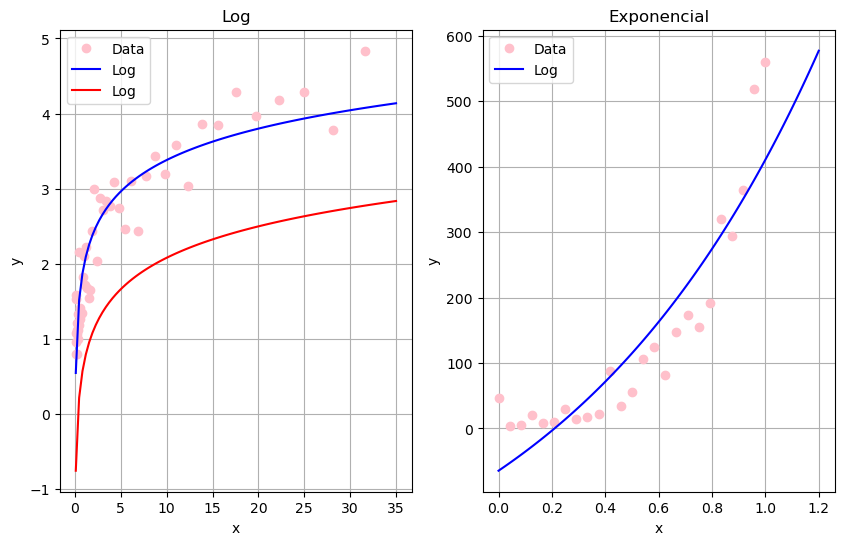

In [100]:
x, y = np.load("ejercicio_4_a.npy")
x = np.array(x)
y = np.array(y)

matrix_design = np.column_stack((np.ones_like(x),np.log(x)))
matrix_designT = np.transpose(matrix_design)
inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)
error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)
#ax^b
# log(a) + b log(x)
xs = np.linspace(-1, 35, 100)
y1 = a[0] + a[1]*(np.log(xs))
y2 = np.log(a[0]) + a[1]*(np.log(xs))
#PREGUNTAR

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(xs, y1, label='Log', color='blue')
plt.plot(xs, y2, label='Log', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Log')
plt.grid(True)
plt.legend()

x, y = np.load("ejercicio_4_b.npy")
x = np.array(x)
y = np.array(y)

matrix_design = np.column_stack((np.ones_like(x),np.exp(x)))
matrix_designT = np.transpose(matrix_design)
inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)
error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)
#ab^x
# a + exp(x) b
xs = np.linspace(0, 1.2, 100)
y1 = a[0] + a[1]*np.exp(xs)

plt.subplot(1, 2, 2)
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(xs, y1, label='Log', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponencial')
plt.grid(True)
plt.legend()
plt.show()

Ejercicio 5. Cuadrados Mínimos Ponderados
En situaciones en las cuales los pares ordenados en el conjunto de datos no tienen la misma variabilidad o no pueden considerarse igualmente precisos, es deseable realizar un ajuste que considere estas diferencias.
Por ejemplo, el uso de diferentes instrumentos de medición o diferentes condiciones de medición derivan en mediciones con distintas magnitudes para el error. Queremos realizar un ajuste por cuadrados mínimos que considere la preferencia por datos más precisos. Para ello consideramos el método de cuadrados mínimos ponderados
a)
Comentar brevemente el objetivo del método de cuadrados mínimos ponderados. Luego, deducir la
solución de cuadrados mínimos ponderados.
b)
Repetir los pasos del ejercicio 2, utilizando cuadrados mínimos ponderados con los datos de los
archivos ejercicio_5_i.npy y ejercicio_5_ii.npy. Comparar con la solución de cuadrados
mínimos convencional (sin considerar los pesos).
c)
¿Qué diferencias encuentra encuentra entre ambos conjuntos de datos? ¿Qué sucede con el ajuste de
la función cuadrática al usar distintos pesos para los datos?¿y con el ajuste de una función cúbica?
d)
Graficar en una misma figura el conjunto de datos y las curvas cuadráticas ajustadas. Mostrar en
una figura lateral los pesos correspondientes a cada caso

[-341.09717054  276.5843135 ]


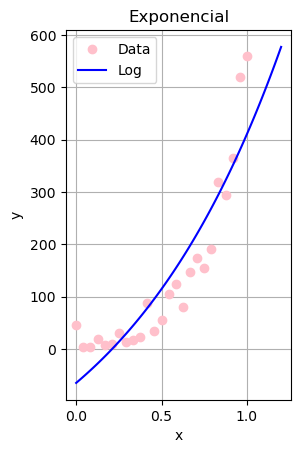

In [93]:
x, y, IW = np.load("ejercicio_5_i.npy")
